In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
#df11 = pd.read_csv(r'C:\jintu\DATA\Raw data Air pollution\my3_1771976.csv')
#df11 = pd.read_csv(r'C:\jintu\DATA\Raw data Air pollution\id1_1753200.csv')
df11 = pd.read_csv(r'C:\jintu\DATA\Raw data Air pollution\id2_1754117.csv')
#dfa = pd.concat([df11,df12]) #([df1,df2,df3,df4,df5,df6,df7,df8,df9,df10,df11])
df11

,created_at,entry_id,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-01 00:00:05 +0530,642435,15.037594,2.538071,557.446809,9.966777,12,95,138.0,153
1,2023-01-01 00:00:25 +0530,642436,7.518797,7.614213,548.936170,3.322259,12,95,138.0,161
2,2023-01-01 00:00:45 +0530,642437,7.518797,5.076142,540.425532,19.933555,12,95,142.0,155
3,2023-01-01 00:01:05 +0530,642438,15.037594,0.000000,561.702128,0.000000,12,95,137.0,154
4,2023-01-01 00:01:25 +0530,642439,7.518797,0.000000,557.446809,0.000000,12,95,135.0,153
...,...,...,...,...,...,...,...,...,...,...
1056832,2022-12-31 23:58:25 +0530,642430,15.037594,5.076142,536.170213,19.933555,12,95,137.0,150
1056833,2022-12-31 23:58:45 +0530,642431,11.278195,0.000000,536.170213,13.289037,12,95,142.0,155
1056834,2022-12-31 23:59:05 +0530,642432,7.518797,0.000000,527.659574,33.222591,12,95,136.0,152
1056835,2022-12-31 23:59:25 +0530,642433,11.278195,0.000000,519.148936,0.000000,12,95,137.0,149


In [5]:
dfa = df11[['created_at','field1','field2','field3','field4','field5',
            'field6','field7','field8']]
#df12.columns = ['created_at', 'id','NO2','O3','CO','SO2','Temp','RH','PM2.5','PM10']
dfa

,created_at,field1,field2,field3,field4,field5,field6,field7,field8
0,2023-01-01 00:00:05 +0530,15.037594,2.538071,557.446809,9.966777,12,95,138.0,153
1,2023-01-01 00:00:25 +0530,7.518797,7.614213,548.936170,3.322259,12,95,138.0,161
2,2023-01-01 00:00:45 +0530,7.518797,5.076142,540.425532,19.933555,12,95,142.0,155
3,2023-01-01 00:01:05 +0530,15.037594,0.000000,561.702128,0.000000,12,95,137.0,154
4,2023-01-01 00:01:25 +0530,7.518797,0.000000,557.446809,0.000000,12,95,135.0,153
...,...,...,...,...,...,...,...,...,...
1056832,2022-12-31 23:58:25 +0530,15.037594,5.076142,536.170213,19.933555,12,95,137.0,150
1056833,2022-12-31 23:58:45 +0530,11.278195,0.000000,536.170213,13.289037,12,95,142.0,155
1056834,2022-12-31 23:59:05 +0530,7.518797,0.000000,527.659574,33.222591,12,95,136.0,152
1056835,2022-12-31 23:59:25 +0530,11.278195,0.000000,519.148936,0.000000,12,95,137.0,149


In [6]:
def pp_sample_fill(df, ts_col, s_freq, fill_method):
    df[ts_col] = df[ts_col].apply(lambda x:x.split('+')[0])
    df[ts_col] = pd.to_datetime(df[ts_col])
    df[ts_col] = df[ts_col].dt.round('min')
    df.fillna(method=fill_method, axis=None, inplace=True, limit=None, downcast=None)
    df.set_index(ts_col, inplace=True)
    data=df.resample(s_freq).mean()
    data.fillna(method=fill_method, axis=None, inplace=True, limit=None, downcast=None)
    return data

In [7]:
df=pd.DataFrame()
df[['created_at','NO2','O3','CO','SO2','Temp','RH','PM2.5','PM10']] = dfa[['created_at','field1',
                                                                           'field2','field3',
                                                                           'field4','field5',
                                                                           'field6','field7',
                                                                           'field8']]
df['created_at'] = df['created_at'].apply(lambda x:x.split('+')[0])
df['created_at'] = pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.round('min')
df

,created_at,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
0,2023-01-01 00:00:00,15.037594,2.538071,557.446809,9.966777,12,95,138.0,153
1,2023-01-01 00:00:00,7.518797,7.614213,548.936170,3.322259,12,95,138.0,161
2,2023-01-01 00:01:00,7.518797,5.076142,540.425532,19.933555,12,95,142.0,155
3,2023-01-01 00:01:00,15.037594,0.000000,561.702128,0.000000,12,95,137.0,154
4,2023-01-01 00:01:00,7.518797,0.000000,557.446809,0.000000,12,95,135.0,153
...,...,...,...,...,...,...,...,...,...
1056832,2022-12-31 23:58:00,15.037594,5.076142,536.170213,19.933555,12,95,137.0,150
1056833,2022-12-31 23:59:00,11.278195,0.000000,536.170213,13.289037,12,95,142.0,155
1056834,2022-12-31 23:59:00,7.518797,0.000000,527.659574,33.222591,12,95,136.0,152
1056835,2022-12-31 23:59:00,11.278195,0.000000,519.148936,0.000000,12,95,137.0,149


In [8]:
df

,created_at,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
0,2023-01-01 00:00:00,15.037594,2.538071,557.446809,9.966777,12,95,138.0,153
1,2023-01-01 00:00:00,7.518797,7.614213,548.936170,3.322259,12,95,138.0,161
2,2023-01-01 00:01:00,7.518797,5.076142,540.425532,19.933555,12,95,142.0,155
3,2023-01-01 00:01:00,15.037594,0.000000,561.702128,0.000000,12,95,137.0,154
4,2023-01-01 00:01:00,7.518797,0.000000,557.446809,0.000000,12,95,135.0,153
...,...,...,...,...,...,...,...,...,...
1056832,2022-12-31 23:58:00,15.037594,5.076142,536.170213,19.933555,12,95,137.0,150
1056833,2022-12-31 23:59:00,11.278195,0.000000,536.170213,13.289037,12,95,142.0,155
1056834,2022-12-31 23:59:00,7.518797,0.000000,527.659574,33.222591,12,95,136.0,152
1056835,2022-12-31 23:59:00,11.278195,0.000000,519.148936,0.000000,12,95,137.0,149


<AxesSubplot:>

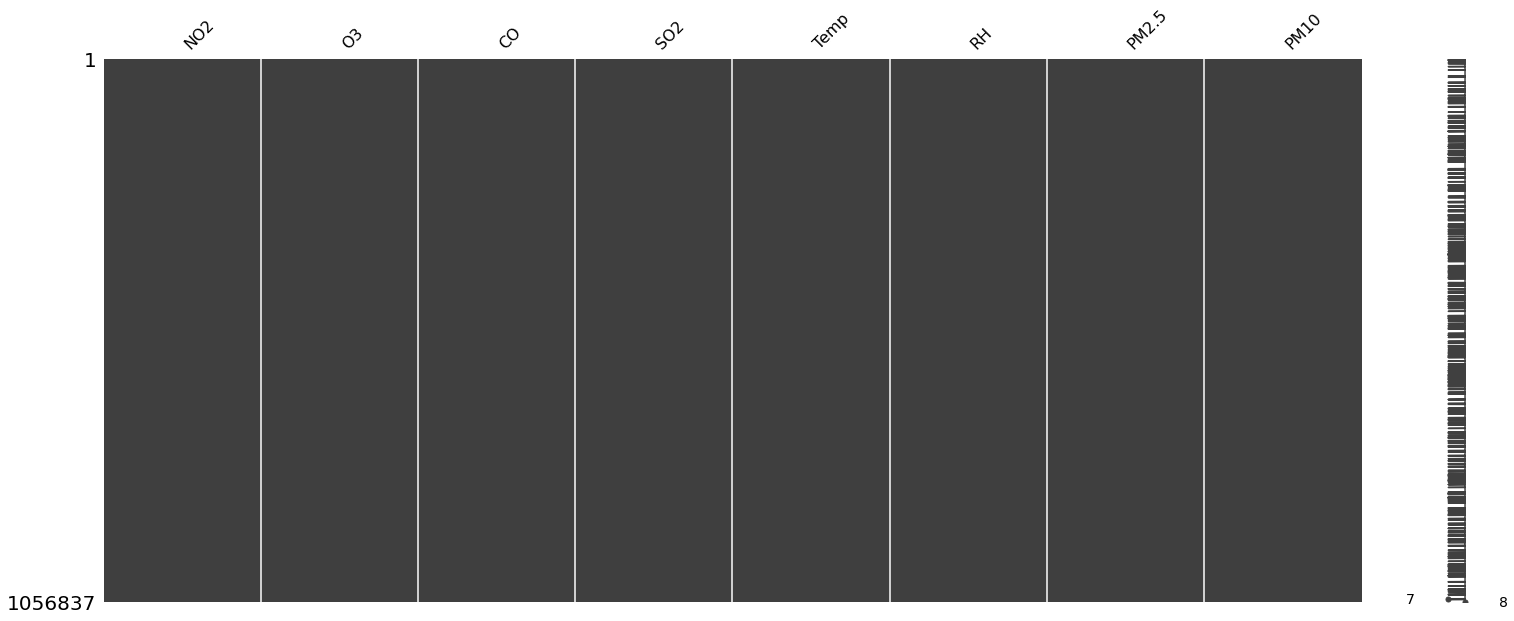

In [9]:
import missingno as msno

msno.matrix(df.set_index('created_at'))

In [10]:
df = df
df['Datetime'] = pd.to_datetime(df['created_at'], format='%Y-%m-%d %H:%M:%S')
df

,created_at,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10,Datetime
0,2023-01-01 00:00:00,15.037594,2.538071,557.446809,9.966777,12,95,138.0,153,2023-01-01 00:00:00
1,2023-01-01 00:00:00,7.518797,7.614213,548.936170,3.322259,12,95,138.0,161,2023-01-01 00:00:00
2,2023-01-01 00:01:00,7.518797,5.076142,540.425532,19.933555,12,95,142.0,155,2023-01-01 00:01:00
3,2023-01-01 00:01:00,15.037594,0.000000,561.702128,0.000000,12,95,137.0,154,2023-01-01 00:01:00
4,2023-01-01 00:01:00,7.518797,0.000000,557.446809,0.000000,12,95,135.0,153,2023-01-01 00:01:00
...,...,...,...,...,...,...,...,...,...,...
1056832,2022-12-31 23:58:00,15.037594,5.076142,536.170213,19.933555,12,95,137.0,150,2022-12-31 23:58:00
1056833,2022-12-31 23:59:00,11.278195,0.000000,536.170213,13.289037,12,95,142.0,155,2022-12-31 23:59:00
1056834,2022-12-31 23:59:00,7.518797,0.000000,527.659574,33.222591,12,95,136.0,152,2022-12-31 23:59:00
1056835,2022-12-31 23:59:00,11.278195,0.000000,519.148936,0.000000,12,95,137.0,149,2022-12-31 23:59:00


In [11]:
#df2 = df1.reset_index(drop='index')[:29233]
dfc = df.set_index('Datetime').resample('1H').mean()
dfc

C:\Users\Lab Engineer\AppData\Local\Temp\ipykernel_15644\1232986345.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dfc = df.set_index('Datetime').resample('1H').mean()


,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
Datetime,,,,,,,,
2022-07-01 08:00:00,0.313283,13.430626,2367.730496,82.225914,23.916667,71.750000,21.375000,30.416667
2022-07-01 09:00:00,3.613200,6.288776,443.498818,15.448505,24.944444,68.133333,15.827778,19.394444
2022-07-01 10:00:00,9.398496,9.926678,210.449173,7.290513,26.000000,67.994444,10.583333,11.472222
2022-07-01 11:00:00,10.254804,10.970107,226.406619,4.023625,26.000000,69.000000,4.755556,5.277778
2022-07-01 12:00:00,12.426901,12.803158,267.659574,4.023625,26.000000,69.544444,4.938547,5.505556
...,...,...,...,...,...,...,...,...
2023-04-21 20:00:00,10.171261,32.092499,26.075650,0.424511,24.000000,81.800000,31.411111,35.233333
2023-04-21 21:00:00,12.385129,30.132544,21.229314,0.369140,23.316667,82.311111,28.900000,31.761111
2023-04-21 22:00:00,17.000835,23.857868,24.964539,0.424511,22.800000,85.833333,26.288889,28.244444


<AxesSubplot:xlabel='Datetime'>

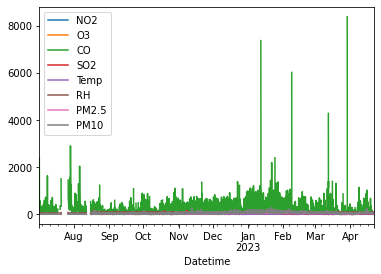

In [12]:
dfc.plot()

<AxesSubplot:xlabel='Datetime'>

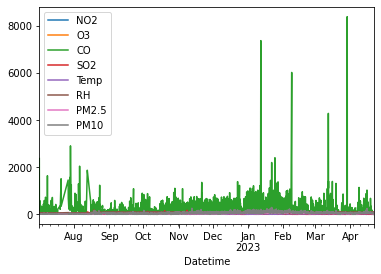

In [13]:
#df1.set_index('created_at', inplace=True)
#df1.resample('1D').mean()
#df2
df_pi = dfc#.reset_index()[['NO2','O3','CO','SO2','Temp','RH','PM2.5','PM10']]
df_imputed = df_pi.interpolate(method='time')
df_imputed.plot()

df.isnull().sum()

In [14]:

data = df_imputed#.set_index('To Date')#.fillna(method="ffill", axis=None, inplace=False, limit=None, downcast=None)
data

,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
Datetime,,,,,,,,
2022-07-01 08:00:00,0.313283,13.430626,2367.730496,82.225914,23.916667,71.750000,21.375000,30.416667
2022-07-01 09:00:00,3.613200,6.288776,443.498818,15.448505,24.944444,68.133333,15.827778,19.394444
2022-07-01 10:00:00,9.398496,9.926678,210.449173,7.290513,26.000000,67.994444,10.583333,11.472222
2022-07-01 11:00:00,10.254804,10.970107,226.406619,4.023625,26.000000,69.000000,4.755556,5.277778
2022-07-01 12:00:00,12.426901,12.803158,267.659574,4.023625,26.000000,69.544444,4.938547,5.505556
...,...,...,...,...,...,...,...,...
2023-04-21 20:00:00,10.171261,32.092499,26.075650,0.424511,24.000000,81.800000,31.411111,35.233333
2023-04-21 21:00:00,12.385129,30.132544,21.229314,0.369140,23.316667,82.311111,28.900000,31.761111
2023-04-21 22:00:00,17.000835,23.857868,24.964539,0.424511,22.800000,85.833333,26.288889,28.244444


In [15]:

#dfa = dfa.set_index('To Date')
#data.reset_index(inplace=True)
print(data.isnull().sum())

NO2      0
O3       0
CO       0
SO2      0
Temp     0
RH       0
PM2.5    0
PM10     0
dtype: int64


In [16]:
#dfc.reset_index(inplace=True)

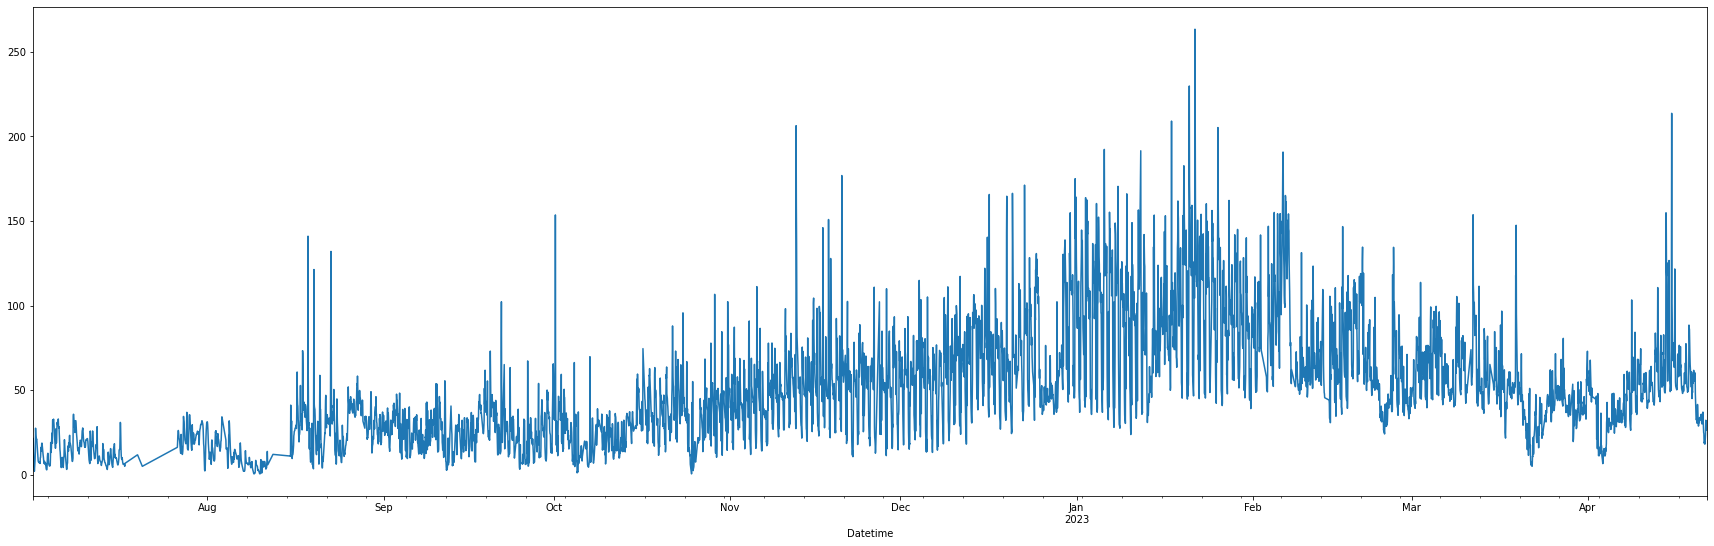

In [17]:
plt.figure(figsize=(30,9))
data['PM2.5'].iloc[:].plot()

plt.show()

In [18]:
data['O3'].iloc[:2000]

Datetime
2022-07-01 08:00:00    13.430626
2022-07-01 09:00:00     6.288776
2022-07-01 10:00:00     9.926678
2022-07-01 11:00:00    10.970107
2022-07-01 12:00:00    12.803158
                         ...    
2022-09-22 11:00:00    18.923101
2022-09-22 12:00:00    22.592645
2022-09-22 13:00:00    26.262190
2022-09-22 14:00:00    29.931735
2022-09-22 15:00:00    18.016965
Freq: H, Name: O3, Length: 2000, dtype: float64

<AxesSubplot:>

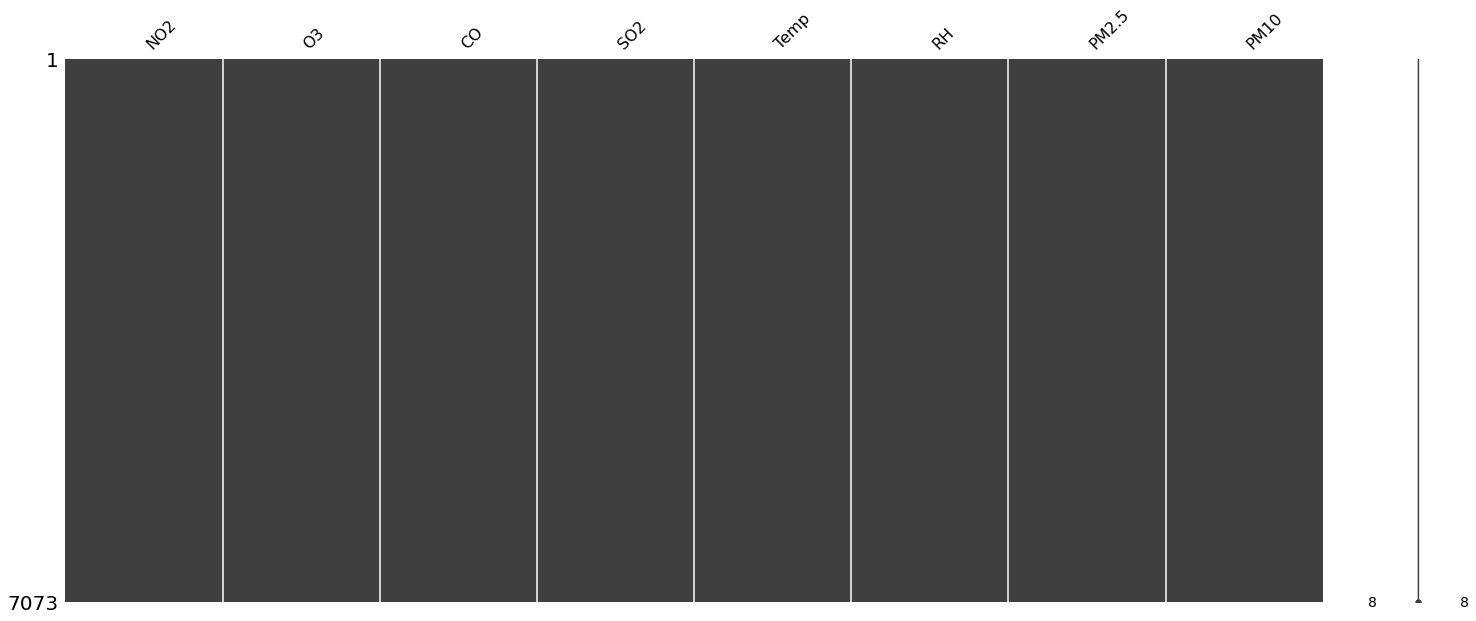

In [19]:
msno.matrix(data)

In [20]:
testdf = data[data.isnull()==False]
testdf

,NO2,O3,CO,SO2,Temp,RH,PM2.5,PM10
Datetime,,,,,,,,
2022-07-01 08:00:00,0.313283,13.430626,2367.730496,82.225914,23.916667,71.750000,21.375000,30.416667
2022-07-01 09:00:00,3.613200,6.288776,443.498818,15.448505,24.944444,68.133333,15.827778,19.394444
2022-07-01 10:00:00,9.398496,9.926678,210.449173,7.290513,26.000000,67.994444,10.583333,11.472222
2022-07-01 11:00:00,10.254804,10.970107,226.406619,4.023625,26.000000,69.000000,4.755556,5.277778
2022-07-01 12:00:00,12.426901,12.803158,267.659574,4.023625,26.000000,69.544444,4.938547,5.505556
...,...,...,...,...,...,...,...,...
2023-04-21 20:00:00,10.171261,32.092499,26.075650,0.424511,24.000000,81.800000,31.411111,35.233333
2023-04-21 21:00:00,12.385129,30.132544,21.229314,0.369140,23.316667,82.311111,28.900000,31.761111
2023-04-21 22:00:00,17.000835,23.857868,24.964539,0.424511,22.800000,85.833333,26.288889,28.244444


In [21]:
target = ['NO2','O3',
         'CO','SO2',
         'PM2.5','PM10']
covs = ['Temp', 'RH']
d_var = data[target]
d_covar = data[covs]

In [22]:
from darts.timeseries import TimeSeries

ts_1 = TimeSeries.from_dataframe(d_var)
ts_2 = TimeSeries.from_dataframe(d_covar)

train_Y = ts_1.drop_after(pd.Timestamp('2022-12-31 23:00:00'))
train_X = ts_2.drop_after(pd.Timestamp('2023-01-31 23:00:00'))

test_Y = ts_1.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))
test_X = ts_2.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))

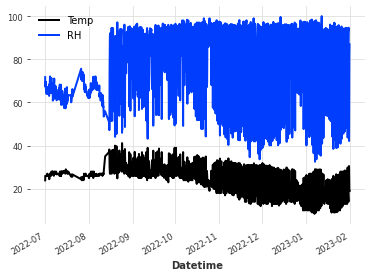

In [23]:
train_X.plot()

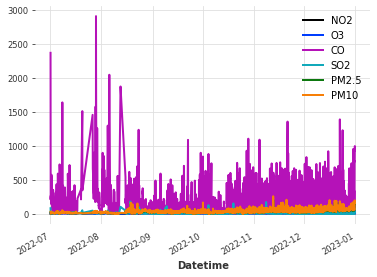

In [24]:
train_Y.plot()

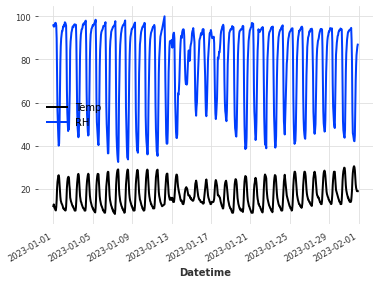

In [25]:
test_X.plot()

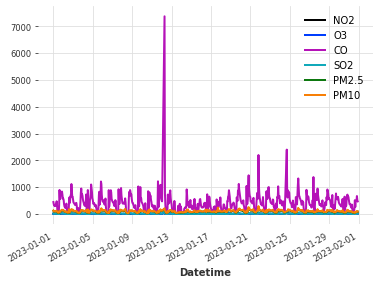

In [26]:
test_Y.plot()

In [27]:
from sklearn.preprocessing import MinMaxScaler
from darts.dataprocessing.transformers import Scaler

scaler = MinMaxScaler(feature_range=(0,1))
transformer1 = Scaler(scaler)
transformer2 = Scaler(scaler)
ts_1_transformed = transformer1.fit_transform(ts_1)
ts_2_transformed = transformer2.fit_transform(ts_2)

In [28]:
train_Y_scaled = ts_1_transformed.drop_after(pd.Timestamp('2022-12-31 23:00:00'))
train_X_scaled = ts_2_transformed.drop_after(pd.Timestamp('2023-01-31 23:00:00'))
                                                                                             
test_Y_scaled = ts_1_transformed.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))
test_X_scaled = ts_2_transformed.drop_before(pd.Timestamp('2022-12-31 23:00:00')).drop_after(pd.Timestamp('2023-01-31 23:00:00'))

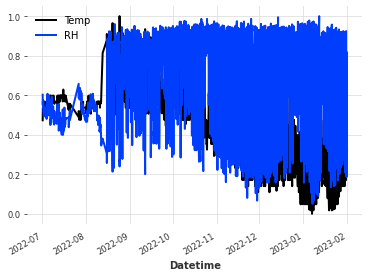

In [29]:
train_X_scaled.plot()

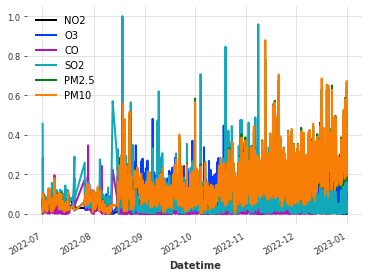

In [30]:
train_Y_scaled.plot()

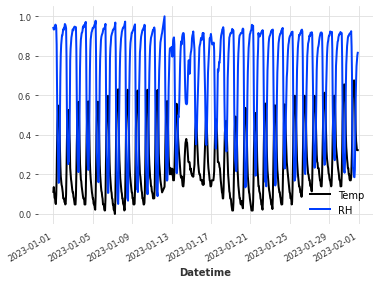

In [31]:
test_X_scaled.plot()

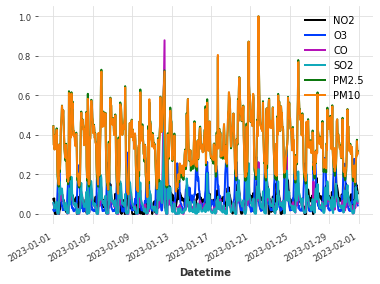

In [32]:
test_Y_scaled.plot()

In [33]:
from darts.models.forecasting.regression_model import RegressionModel as RM
from sklearn.linear_model import Ridge

model_rm = RM(model=Ridge(),
              lags=12,
              lags_future_covariates=(12,2),
              output_chunk_length=24)
model_rm.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_rm = model_rm.predict(len(test_X_scaled))

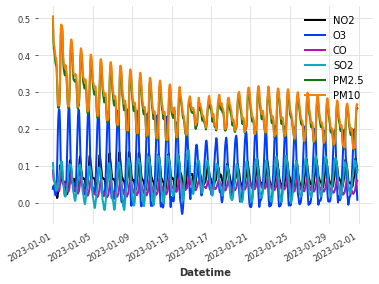

In [34]:
pred_rm.plot()

In [35]:
from darts.models import LinearRegressionModel as LRM

model_lrm = LRM(
              lags=12,
              lags_future_covariates=(12,2),
              output_chunk_length=24,
multi_models=True)
model_lrm.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_lrm = model_lrm.predict(len(test_X_scaled))

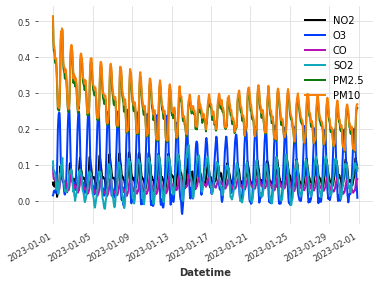

In [36]:
pred_lrm.plot()

In [37]:
from darts.models import BlockRNNModel as RNN

model_rnn = RNN(model='RNN',
                input_chunk_length=12,
              output_chunk_length=24,
               n_rnn_layers=5,
               hidden_dim=64,
               dropout=0.2,
               batch_size=24)

model_rnn.fit(train_Y_scaled, past_covariates=train_X_scaled)
pred_rnn = model_rnn.predict(len(test_X_scaled))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | RNN              | 38.0 K
4 | fc            | Sequential       | 9.4 K 
---------------------------------------------------
47.4 K    Trainable params
0         Non-trainable params
47.4 K    Total params
0.379     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

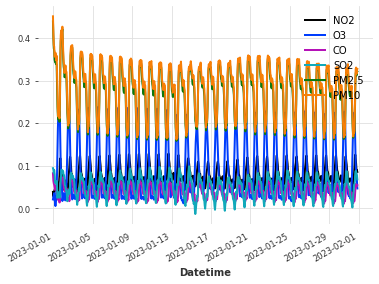

In [38]:
pred_rnn.plot()

In [39]:
model_lstm = RNN(model='LSTM',
                input_chunk_length=12,
              output_chunk_length=24,
               n_rnn_layers=5,
               hidden_dim=64,
               dropout=0.2,
               batch_size=24)

model_lstm.fit(train_Y_scaled, past_covariates=train_X_scaled)
pred_lstm = model_lstm.predict(len(test_X_scaled))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | LSTM             | 152 K 
4 | fc            | Sequential       | 9.4 K 
---------------------------------------------------
161 K     Trainable params
0         Non-trainable params
161 K     Total params
1.291     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

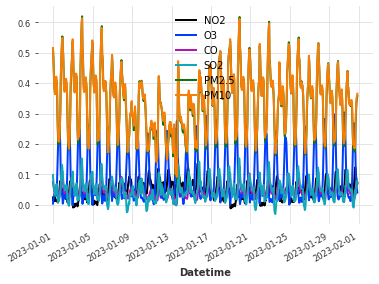

In [40]:
pred_lstm.plot()

In [41]:
model_gru = RNN(model='GRU',
                input_chunk_length=12,
              output_chunk_length=24,
               n_rnn_layers=5,
               hidden_dim=64,
               dropout=0.2,
               batch_size=24)

model_gru.fit(train_Y_scaled, past_covariates=train_X_scaled)
pred_gru = model_gru.predict(len(test_X_scaled))

GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs

  | Name          | Type             | Params
---------------------------------------------------
0 | criterion     | MSELoss          | 0     
1 | train_metrics | MetricCollection | 0     
2 | val_metrics   | MetricCollection | 0     
3 | rnn           | GRU              | 114 K 
4 | fc            | Sequential       | 9.4 K 
---------------------------------------------------
123 K     Trainable params
0         Non-trainable params
123 K     Total params
0.987     Total estimated model params size (MB)


Training: 0it [00:00, ?it/s]

`Trainer.fit` stopped: `max_epochs=100` reached.
GPU available: False, used: False
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


Predicting: 0it [00:00, ?it/s]

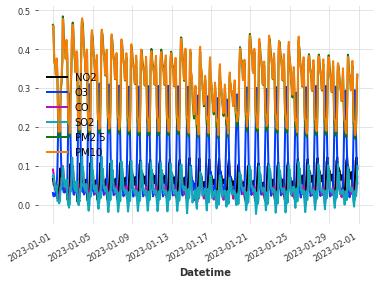

In [42]:
pred_gru.plot()

In [43]:
from darts.models import XGBModel as XGB

model_xgb = XGB(lags=12,
               lags_future_covariates=(12,2),
               output_chunk_length=24)

model_xgb.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_xgb = model_xgb.predict(len(test_Y_scaled))

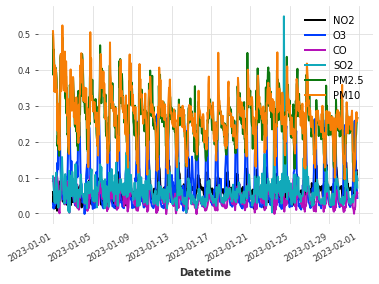

In [44]:
pred_xgb.plot()

In [45]:
from darts.models import LightGBMModel as LGB

model_lgb = LGB(lags=12,
               lags_future_covariates=(12,2),
               output_chunk_length=24)

model_lgb.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_lgb = model_lgb.predict(len(test_Y_scaled))

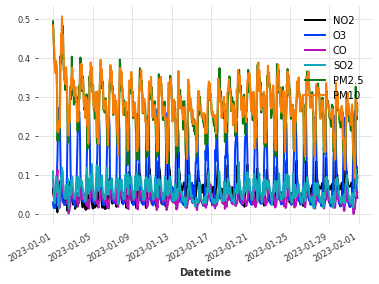

In [46]:
pred_lgb.plot()

In [47]:
from darts.models import RandomForest as RF

model_rf = RF(lags=12,
               lags_future_covariates=(12,2),
               output_chunk_length=24,
             n_estimators=500,
             max_depth=50,
             multi_models=True)

model_rf.fit(train_Y_scaled, future_covariates=train_X_scaled)
pred_rf = model_rf.predict(len(test_Y_scaled))

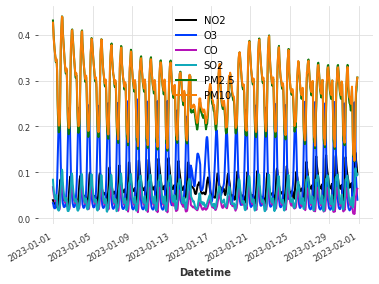

In [48]:
pred_rf.plot()

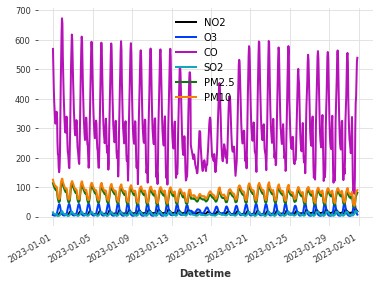

In [49]:
transformer1.inverse_transform(pred_rf).plot()

In [50]:
transformer1.inverse_transform(pred_rnn).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\ID2\rnn_preds.xlsx')
transformer1.inverse_transform(pred_lstm).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\ID2\lstm_preds.xlsx')
transformer1.inverse_transform(pred_gru).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\ID2\gru_preds.xlsx')
transformer1.inverse_transform(pred_xgb).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\ID2\xgb_preds.xlsx')
transformer1.inverse_transform(pred_lgb).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\ID2\lgb_preds.xlsx')
transformer1.inverse_transform(pred_rf).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\ID2\rf_preds.xlsx')
transformer1.inverse_transform(test_Y_scaled).pd_dataframe().to_excel(r'C:\jintu\TAR LSTM Work\ID2\actuals.xlsx')